# Limpeza e Análise de Dados

O objetivo desta atividade consiste na limpeza e análise dos dados obtidos na raspagem realizada na aba de despesas do site da Sefaz. Para isto, procederemos como segue: 
0. Preparação
1. Limpeza dos dados
2. Estatísticas e Visualização
3. Análise e Discussão

Estes passos podem ocorrer de maneira cíclica até que o agente esteja satisfeito.

## 0. Preparação

### Importação de Bibliotecas

In [1]:
%matplotlib inline 
import pandas as pd # manipulação de dados
import matplotlib.pyplot as plt # visualização
import seaborn as sns #visualização
sns.set(style="whitegrid") # Pra ficar bonitinho

### Leitura do conjunto de dados

In [2]:
df_fonte = pd.read_csv('output/sefaz-Fonte de Recurso.csv', index_col=0)
print(df_fonte.shape)
df_fonte

(1976, 14)


,0,1,ano,periodo,grupo,consulta,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
0,NaN,NaN,2019,Consolidado,Estado,Fonte de Recurso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Principal BGE LDO LOA LRF Municípios Rec...,Principal BGE LDO LOA LRF Municípios Rec...,2019,Consolidado,Estado,Fonte de Recurso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Principal BGE LDO LOA LRF Municípios Rec...,Data: 29/03/2019,2019,Consolidado,Estado,Fonte de Recurso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Principal BGE LDO LOA LRF Municípios Rec...,Data: 29/03/2019,2019,Consolidado,Estado,Fonte de Recurso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2019,Consolidado,Estado,Fonte de Recurso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2019,Consolidado,Estado,Fonte de Recurso,function setup() { } function imprimirRelator...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,2019,Consolidado,Estado,Fonte de Recurso,Despesas::Estado::Fonte de Recurso,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,2019,Consolidado,Estado,Fonte de Recurso,Ano 2019 DOWNLOAD Lista das Fontes de Recur...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,2019,Consolidado,Estado,Fonte de Recurso,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
9,NaN,NaN,2019,Consolidado,Estado,Fonte de Recurso,Total:,17297084000.00,17748335786.65,4376065637.36,3425936306.12,3043822930.73,437821842.19,187535541.97


## 1. Limpeza

Esta etapa envolve a remoção de colunas e linhas incompletas, irrelevantes ou erradas.

### Remoção

df_fonte.drop(itens, axis=?, inplace=?)

itens: colunas ou linhas que devem ser removidas

axis: 
* 0: linhas
* 1: colunas

inplace: transcrever a base atual com a nova? (True ou False)

In [3]:
df_fonte.drop(['0', '1'], axis=1, inplace=True)

df_fonte

,ano,periodo,grupo,consulta,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
0,2019,Consolidado,Estado,Fonte de Recurso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,Consolidado,Estado,Fonte de Recurso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,Consolidado,Estado,Fonte de Recurso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,Consolidado,Estado,Fonte de Recurso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,Consolidado,Estado,Fonte de Recurso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019,Consolidado,Estado,Fonte de Recurso,function setup() { } function imprimirRelator...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019,Consolidado,Estado,Fonte de Recurso,Despesas::Estado::Fonte de Recurso,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019,Consolidado,Estado,Fonte de Recurso,Ano 2019 DOWNLOAD Lista das Fontes de Recur...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019,Consolidado,Estado,Fonte de Recurso,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
9,2019,Consolidado,Estado,Fonte de Recurso,Total:,17297084000.00,17748335786.65,4376065637.36,3425936306.12,3043822930.73,437821842.19,187535541.97


#### Aumentar a quantidade de linhas que podem ser visualizadas:

In [4]:
pd.options.display.max_rows = 10000

#### Visualizar o conjunto de dados novamente

In [5]:
print(df_fonte.shape)
df_fonte

(1976, 12)


,ano,periodo,grupo,consulta,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
0,2019,Consolidado,Estado,Fonte de Recurso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,Consolidado,Estado,Fonte de Recurso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,Consolidado,Estado,Fonte de Recurso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,Consolidado,Estado,Fonte de Recurso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,Consolidado,Estado,Fonte de Recurso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019,Consolidado,Estado,Fonte de Recurso,function setup() { } function imprimirRelator...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019,Consolidado,Estado,Fonte de Recurso,Despesas::Estado::Fonte de Recurso,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019,Consolidado,Estado,Fonte de Recurso,Ano 2019 DOWNLOAD Lista das Fontes de Recur...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019,Consolidado,Estado,Fonte de Recurso,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
9,2019,Consolidado,Estado,Fonte de Recurso,Total:,17297084000.00,17748335786.65,4376065637.36,3425936306.12,3043822930.73,437821842.19,187535541.97


#### Remover NaNs

df_fonte.dropna(subset=?, inplace=?)

subset: conjunto de linhas ou colunas que devem ser analisadas

In [6]:
df_fonte.dropna(subset=['Fonte de Recurso', 'Dotação Inicial', 
                        'Autorizado', 'Empenhado', 'Liquidado', 
                        'Pago', 'Pago Exercício Anterior', 
                        'A Pagar Exercício Anterior'], inplace=True)
print(df_fonte.shape)

(1300, 12)


#### Problema: O cabeçalho se repete!

Isolando linhas em que isso ocorre:

In [7]:
df_fonte.loc[df_fonte['Dotação Inicial']=='Dotação Inicial']

,ano,periodo,grupo,consulta,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
8,2019,Consolidado,Estado,Fonte de Recurso,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
68,2019,Consolidado,Estado,Fonte de Recurso,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
187,2018,Consolidado,Estado,Fonte de Recurso,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
258,2018,Consolidado,Estado,Fonte de Recurso,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
399,2017,Consolidado,Estado,Fonte de Recurso,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
466,2017,Consolidado,Estado,Fonte de Recurso,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
599,2016,Consolidado,Estado,Fonte de Recurso,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
664,2016,Consolidado,Estado,Fonte de Recurso,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
793,2015,Consolidado,Estado,Fonte de Recurso,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
861,2015,Consolidado,Estado,Fonte de Recurso,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior


#### Removendo linhas em que o cabeçalho se repete:

In [8]:
df_fonte.drop(df_fonte.loc[df_fonte['Dotação Inicial']=='Dotação Inicial'].index, inplace=True)
df_fonte

,ano,periodo,grupo,consulta,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
9,2019,Consolidado,Estado,Fonte de Recurso,Total:,17297084000.00,17748335786.65,4376065637.36,3425936306.12,3043822930.73,437821842.19,187535541.97
10,2019,Consolidado,Estado,Fonte de Recurso,01000000 - Recursos Ordinários,8879047000.00,8879047000.00,2428777999.55,2205880522.43,2004043830.84,180564446.52,118820120.83
11,2019,Consolidado,Estado,Fonte de Recurso,01100000 - Recursos de Depósitos Judiciais da ...,25080000.00,101781347.78,53654977.28,53648719.65,53648719.65,0.00,0.00
12,2019,Consolidado,Estado,Fonte de Recurso,01110000 - Acordos - Recofarma,1569000.00,1569000.00,0.00,0.00,0.00,0.00,0.00
13,2019,Consolidado,Estado,Fonte de Recurso,01120000 - Acordos - Visteon,29000.00,29000.00,0.00,0.00,0.00,0.00,0.00
14,2019,Consolidado,Estado,Fonte de Recurso,01130000 - Acordos - Manaus Refrigerante,1000.00,1000.00,0.00,0.00,0.00,0.00,0.00
15,2019,Consolidado,Estado,Fonte de Recurso,01140000 - Acordos - Pepsi-Cola,404000.00,404000.00,0.00,0.00,0.00,0.00,0.00
16,2019,Consolidado,Estado,Fonte de Recurso,01150000 - Alienação de Bens,951000.00,951000.00,0.00,0.00,0.00,0.00,0.00
17,2019,Consolidado,Estado,Fonte de Recurso,01160000 - Contribuição para o Desenvolvimento...,413659000.00,413659000.00,101238611.25,83696138.88,63577468.05,9644522.87,962125.51
18,2019,Consolidado,Estado,Fonte de Recurso,01180000 - RECURSOS DO FECOP,26080000.00,26080000.00,0.00,0.00,0.00,3749238.15,220359.36


#### Verificar totais

In [9]:
df_fonte.loc[df_fonte['Fonte de Recurso']=='Total:']

,ano,periodo,grupo,consulta,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
9,2019,Consolidado,Estado,Fonte de Recurso,Total:,17297084000.00,17748335786.65,4376065637.36,3425936306.12,3043822930.73,437821842.19,187535541.97
65,2019,Consolidado,Estado,Fonte de Recurso,Total:,17297084000.00,17748335786.65,4376065637.36,3425936306.12,3043822930.73,437821842.19,187535541.97
69,2019,Consolidado,Estado,Fonte de Recurso,Total:,17297084000.00,17748335786.65,4376065637.36,3425936306.12,3043822930.73,437821842.19,187535541.97
124,2019,Consolidado,Estado,Fonte de Recurso,Total:,17297084000.00,17748335786.65,4376065637.36,3425936306.12,3043822930.73,437821842.19,187535541.97
178,2019,Consolidado,Estado,Fonte de Recurso,Total:,17297084000.0,17748335786.65,4376065637.36,3425936306.12,3043822930.73,437821842.19,187535541.97
188,2018,Consolidado,Estado,Fonte de Recurso,Total:,15324184000.00,19027282667.24,17630658179.52,17044155436.78,16700429152.15,896550708.26,90270769.88
255,2018,Consolidado,Estado,Fonte de Recurso,Total:,15324184000.00,19027282667.24,17630658179.52,17044155436.78,16700429152.15,896550708.26,90270769.88
259,2018,Consolidado,Estado,Fonte de Recurso,Total:,15324184000.00,19027282667.24,17630658179.52,17044155436.78,16700429152.15,896550708.26,90270769.88
325,2018,Consolidado,Estado,Fonte de Recurso,Total:,15324184000.00,19027282667.24,17630658179.52,17044155436.78,16700429152.15,896550708.26,90270769.88
390,2018,Consolidado,Estado,Fonte de Recurso,Total:,15324184000.0,19027282667.24,17630658179.52,17044155436.78,16700429152.15,896550708.26,90270769.88


#### Remover linhas duplicadas

Note que há repetições em que a Dotação Inicil está descrita com .00, e outras em que está com .0 !!

Os dados estão em formato de texto! Vamos convertê-los para reais:

In [10]:
df_fonte.dtypes

ano                            int64
periodo                       object
grupo                         object
consulta                      object
Fonte de Recurso              object
Dotação Inicial               object
Autorizado                    object
Empenhado                     object
Liquidado                     object
Pago                          object
Pago Exercício Anterior       object
A Pagar Exercício Anterior    object
dtype: object

In [11]:
df_fonte[['Dotação Inicial',
          'Autorizado', 'Empenhado', 'Liquidado', 
          'Pago', 'Pago Exercício Anterior', 
          'A Pagar Exercício Anterior']] = df_fonte[['Dotação Inicial',
                                                     'Autorizado', 'Empenhado', 'Liquidado', 
                                                     'Pago', 'Pago Exercício Anterior', 
                                                     'A Pagar Exercício Anterior']].astype(float)

df_fonte.drop_duplicates(keep='first', inplace=True)
df_fonte.shape

(424, 12)

#### Verificar totais novamente: 

In [12]:
df_fonte.loc[df_fonte['Fonte de Recurso']=='Total:']

,ano,periodo,grupo,consulta,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
9,2019,Consolidado,Estado,Fonte de Recurso,Total:,1.729708e+10,1.774834e+10,4.376066e+09,3.425936e+09,3.043823e+09,4.378218e+08,1.875355e+08
188,2018,Consolidado,Estado,Fonte de Recurso,Total:,1.532418e+10,1.902728e+10,1.763066e+10,1.704416e+10,1.670043e+10,8.965507e+08,9.027077e+07
400,2017,Consolidado,Estado,Fonte de Recurso,Total:,1.468058e+10,1.694299e+10,1.532490e+10,1.465658e+10,1.419771e+10,6.424389e+08,9.985857e+07
600,2016,Consolidado,Estado,Fonte de Recurso,Total:,1.605423e+10,1.777435e+10,1.499726e+10,1.452507e+10,1.421030e+10,4.908795e+08,1.732689e+08
794,2015,Consolidado,Estado,Fonte de Recurso,Total:,1.545802e+10,1.643270e+10,1.447749e+10,1.420070e+10,1.385677e+10,6.580910e+08,1.289175e+08
997,2014,Consolidado,Estado,Fonte de Recurso,Total:,1.460047e+10,1.669683e+10,1.556529e+10,1.493393e+10,1.466989e+10,8.267790e+08,1.109360e+08
1200,2013,Consolidado,Estado,Fonte de Recurso,Total:,1.298510e+10,1.579390e+10,1.456953e+10,1.373186e+10,1.354124e+10,7.076778e+08,9.340454e+07


#### Atribuir totais a outro conjunto de dados e removê-los do conjunto principal

In [13]:
df_fonte_totais = df_fonte.loc[df_fonte['Fonte de Recurso']=='Total:']
df_fonte.drop(df_fonte.loc[df_fonte['Fonte de Recurso']=='Total:'].index, inplace=True)

In [14]:
df_fonte_totais

,ano,periodo,grupo,consulta,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
9,2019,Consolidado,Estado,Fonte de Recurso,Total:,1.729708e+10,1.774834e+10,4.376066e+09,3.425936e+09,3.043823e+09,4.378218e+08,1.875355e+08
188,2018,Consolidado,Estado,Fonte de Recurso,Total:,1.532418e+10,1.902728e+10,1.763066e+10,1.704416e+10,1.670043e+10,8.965507e+08,9.027077e+07
400,2017,Consolidado,Estado,Fonte de Recurso,Total:,1.468058e+10,1.694299e+10,1.532490e+10,1.465658e+10,1.419771e+10,6.424389e+08,9.985857e+07
600,2016,Consolidado,Estado,Fonte de Recurso,Total:,1.605423e+10,1.777435e+10,1.499726e+10,1.452507e+10,1.421030e+10,4.908795e+08,1.732689e+08
794,2015,Consolidado,Estado,Fonte de Recurso,Total:,1.545802e+10,1.643270e+10,1.447749e+10,1.420070e+10,1.385677e+10,6.580910e+08,1.289175e+08
997,2014,Consolidado,Estado,Fonte de Recurso,Total:,1.460047e+10,1.669683e+10,1.556529e+10,1.493393e+10,1.466989e+10,8.267790e+08,1.109360e+08
1200,2013,Consolidado,Estado,Fonte de Recurso,Total:,1.298510e+10,1.579390e+10,1.456953e+10,1.373186e+10,1.354124e+10,7.076778e+08,9.340454e+07


In [15]:
df_fonte

,ano,periodo,grupo,consulta,Fonte de Recurso,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
10,2019,Consolidado,Estado,Fonte de Recurso,01000000 - Recursos Ordinários,8.879047e+09,8.879047e+09,2.428778e+09,2.205881e+09,2.004044e+09,1.805644e+08,1.188201e+08
11,2019,Consolidado,Estado,Fonte de Recurso,01100000 - Recursos de Depósitos Judiciais da ...,2.508000e+07,1.017813e+08,5.365498e+07,5.364872e+07,5.364872e+07,0.000000e+00,0.000000e+00
12,2019,Consolidado,Estado,Fonte de Recurso,01110000 - Acordos - Recofarma,1.569000e+06,1.569000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
13,2019,Consolidado,Estado,Fonte de Recurso,01120000 - Acordos - Visteon,2.900000e+04,2.900000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
14,2019,Consolidado,Estado,Fonte de Recurso,01130000 - Acordos - Manaus Refrigerante,1.000000e+03,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
15,2019,Consolidado,Estado,Fonte de Recurso,01140000 - Acordos - Pepsi-Cola,4.040000e+05,4.040000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
16,2019,Consolidado,Estado,Fonte de Recurso,01150000 - Alienação de Bens,9.510000e+05,9.510000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
17,2019,Consolidado,Estado,Fonte de Recurso,01160000 - Contribuição para o Desenvolvimento...,4.136590e+08,4.136590e+08,1.012386e+08,8.369614e+07,6.357747e+07,9.644523e+06,9.621255e+05
18,2019,Consolidado,Estado,Fonte de Recurso,01180000 - RECURSOS DO FECOP,2.608000e+07,2.608000e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.749238e+06,2.203594e+05
19,2019,Consolidado,Estado,Fonte de Recurso,01190000 - Outras Contribuições Decorrentes de...,2.248900e+07,2.248900e+07,0.000000e+00,0.000000e+00,0.000000e+00,1.718938e+05,0.000000e+00


### Dados limpos!!!

## 2. Estatísticas e Visualização

Para ajudar na visualização: 

In [16]:
pd.options.display.float_format = '{:20,.2f}'.format

#### Descrição dos conjuntos:

In [17]:
df_fonte.describe()

,ano,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
count,417.00,417.00,417.00,417.00,417.00,417.00,417.00,417.00
mean,"2,015.96","255,155,095.92","288,768,320.84","232,472,885.01","221,866,269.05","216,355,303.19","11,175,632.62","2,120,364.10"
std,1.98,"1,037,029,488.40","1,094,136,299.56","986,300,241.25","967,634,758.96","947,777,699.67","33,205,839.12","13,345,650.67"
min,"2,013.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,014.00",0.00,"1,629,360.44","654,667.73","315,000.00","204,113.69",0.00,0.00
50%,"2,016.00","5,000.00","18,946,069.42","10,775,989.80","8,261,764.87","8,097,234.91","612,470.56",18.00
75%,"2,018.00","75,000,000.00","125,000,000.00","81,466,895.51","63,566,903.91","61,077,851.20","6,206,539.71","93,296.12"
max,"2,019.00","8,879,047,000.00","9,058,106,020.49","9,029,965,638.13","8,904,174,948.04","8,723,708,928.18","277,016,594.11","157,248,198.23"


In [18]:
df_fonte_totais.describe()

,ano,Dotação Inicial,Autorizado,Empenhado,Liquidado,Pago,Pago Exercício Anterior,A Pagar Exercício Anterior
count,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00
mean,"2,016.00","15,199,953,571.43","17,202,341,398.45","13,848,741,863.97","13,216,890,599.08","12,888,594,490.20","665,748,400.63","126,313,118.39"
std,2.16,"1,338,188,946.10","1,068,844,999.83","4,308,789,888.71","4,443,648,824.19","4,461,812,623.22","165,373,441.81","39,323,748.01"
min,"2,013.00","12,985,098,000.00","15,793,901,012.71","4,376,065,637.36","3,425,936,306.12","3,043,822,930.73","437,821,842.19","90,270,769.88"
25%,"2,014.50","14,640,525,500.00","16,564,765,072.18","14,523,509,151.97","13,966,280,861.17","13,699,001,043.90","566,659,216.48","96,631,555.60"
50%,"2,016.00","15,324,184,000.00","16,942,985,284.00","14,997,260,040.99","14,525,065,314.54","14,197,713,022.50","658,091,019.07","110,935,956.34"
75%,"2,017.50","15,756,129,000.00","17,761,345,340.42","15,445,095,443.00","14,795,257,706.89","14,440,097,119.12","767,228,400.95","151,093,224.67"
max,"2,019.00","17,297,084,000.00","19,027,282,667.24","17,630,658,179.52","17,044,155,436.78","16,700,429,152.15","896,550,708.26","187,535,541.97"


Plotar quantidade de vezes que cada fonte de recurso esteve presente nos relatórios da Sefaz

<Figure size 432x288 with 0 Axes>

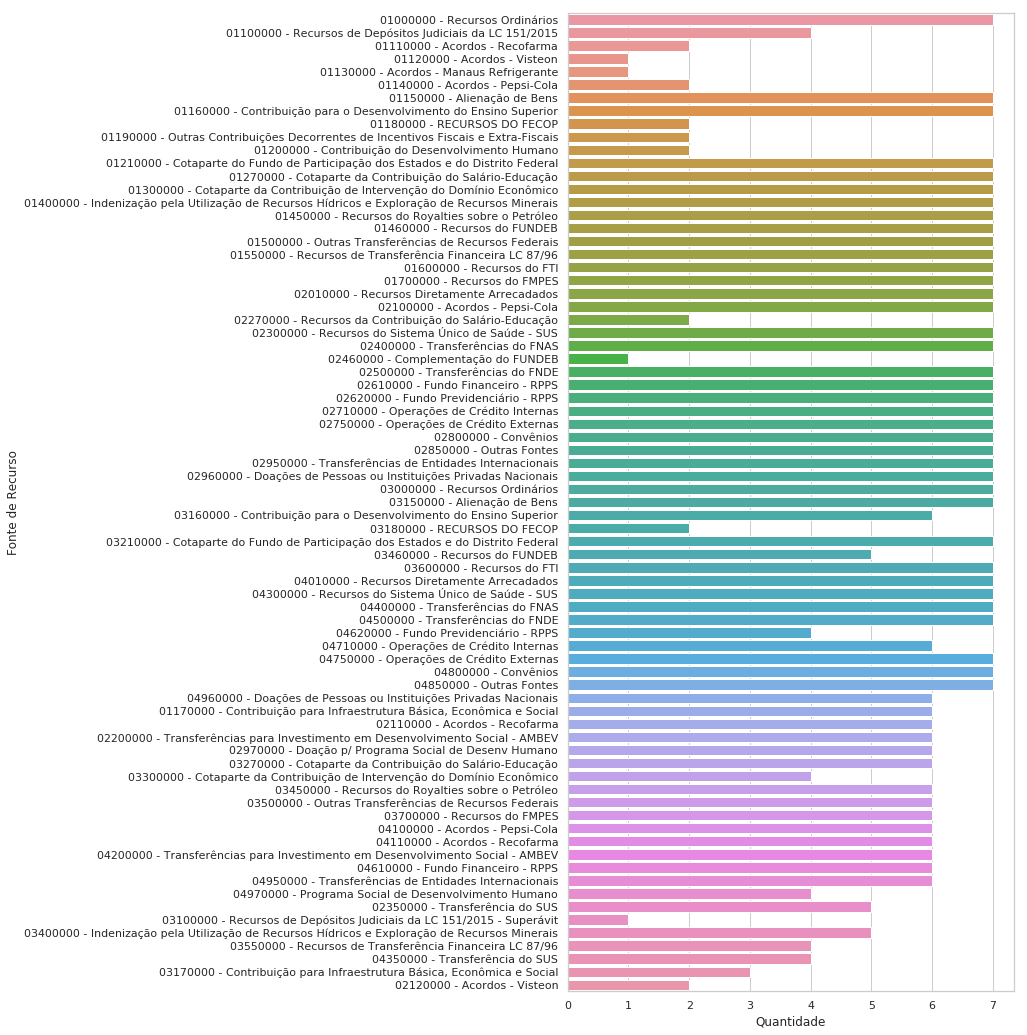

In [19]:
plt.clf()
fig, ax = plt.subplots(figsize=(8,18))
sns.countplot(ax=ax, y='Fonte de Recurso', data=df_fonte)
ax.set_xlabel("Quantidade")
ax.figure.savefig("output/graficos/linha-total.png")

Plotar um gráfico de barras que mostre os valores a ser pagos do exercício anterior por ano

<Figure size 432x288 with 0 Axes>

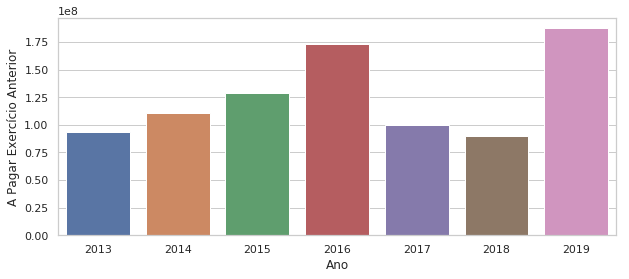

In [20]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(ax=ax, x='ano', y='A Pagar Exercício Anterior', data=df_fonte_totais)
ax.set_xlabel("Ano")
ax.figure.savefig("output/graficos/barra-a-pagar.png")

Plotar um gráfico de barras que mostre os valores a ser pagos do exercício anterior por fonte de recurso

<Figure size 432x288 with 0 Axes>

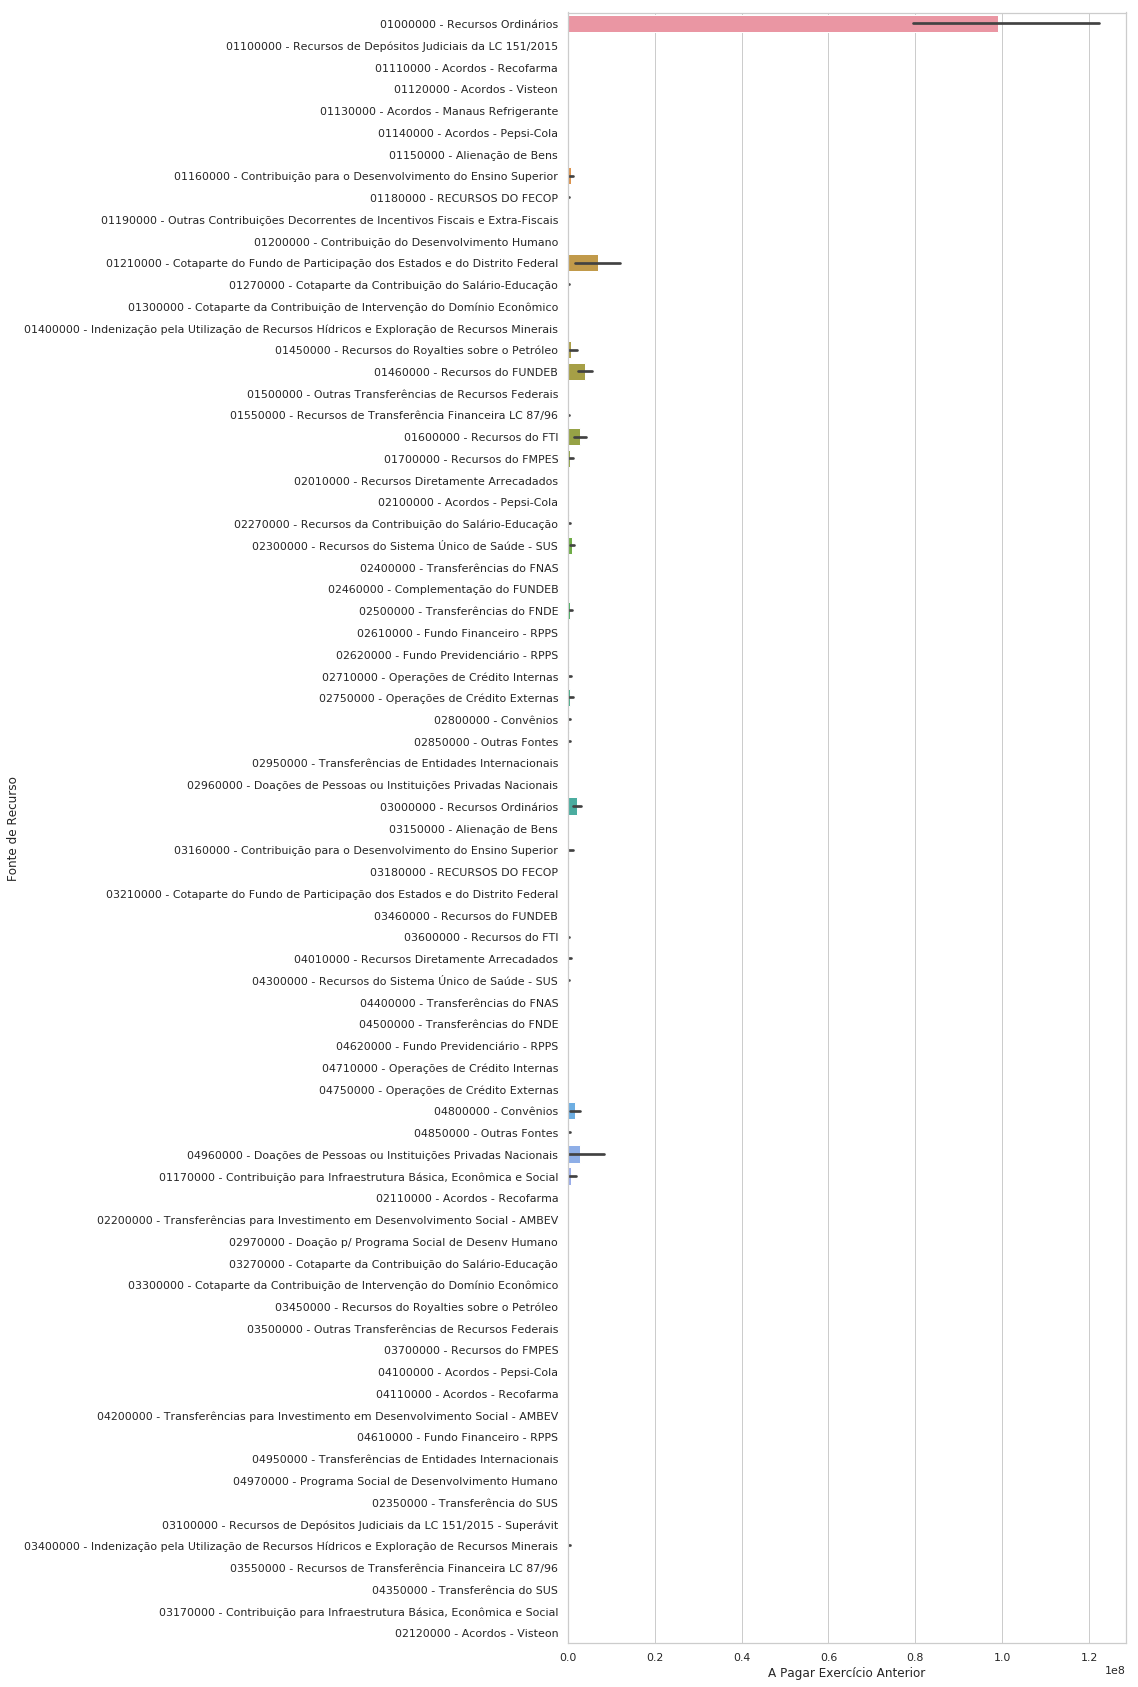

In [21]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 30))
sns.barplot(ax=ax, x='A Pagar Exercício Anterior', y='Fonte de Recurso', data=df_fonte)
ax.figure.savefig("output/graficos/barra-a-pagar.png")

Plotar um gráfico de linhas com os valores em cada ano

In [22]:
df_fonte_totais.columns.drop(['ano', 'periodo', 'consulta'])

Index(['grupo', 'Fonte de Recurso', 'Dotação Inicial', 'Autorizado',
       'Empenhado', 'Liquidado', 'Pago', 'Pago Exercício Anterior',
       'A Pagar Exercício Anterior'],
      dtype='object')

In [23]:
df_fonte_totais.index = df_fonte_totais['ano']
df_fonte_totais.drop(['ano', 'grupo', 'periodo', 'consulta','Fonte de Recurso'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


<Figure size 432x288 with 0 Axes>

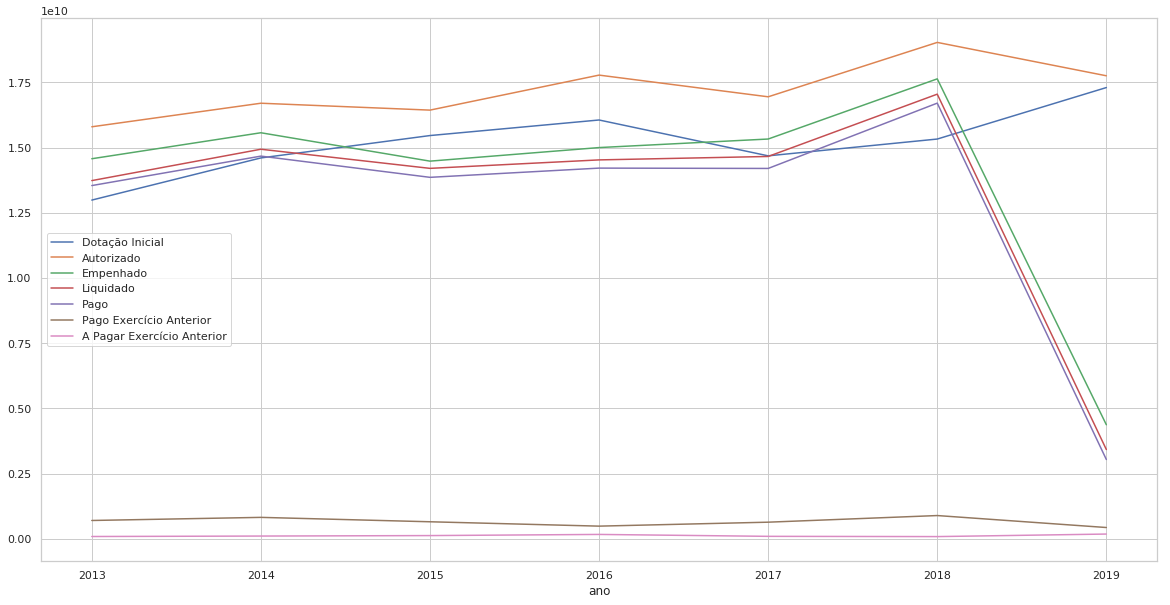

In [24]:
plt.clf()
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=df_fonte_totais[['Dotação Inicial','Autorizado','Empenhado',
                                   'Liquidado','Pago', 'Pago Exercício Anterior', 
                                   'A Pagar Exercício Anterior']], dashes=False)
ax.figure.savefig("output/graficos/linha-total.png")